In [60]:
# ***sentiment analysis of baby product reviews on Amazon***
#https://www.dotnetperls.com/translate-python
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [61]:
dataset=pd.read_csv('amazon_baby.csv')
dataset_original=dataset    #saving original dataset into 'dataset_original'

In [62]:
dataset.shape  #(183531, 3)
dataset.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


In [63]:
dataset.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [64]:
#just checking what all rating scale are used and with what frequency. We can see most reviews have rating 5
# so, overall positive sentiment is reflected.
dataset.rating.value_counts()
# implement this on a histogram as well - done

5    107054
4     33205
3     16779
1     15183
2     11310
Name: rating, dtype: int64

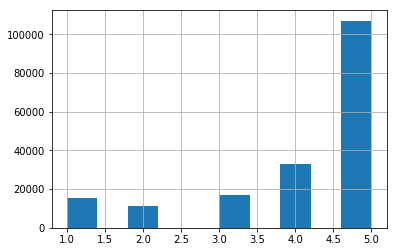

In [65]:
#plt.bar(dataset.rating.value_counts(),1)
dataset.rating.hist()

In [66]:
#**perform text cleaning**
# check if NAs exist in 'review' col - done
#Replace those NAs by empty strings - done
#remove punctuation from 'review' col - done 
#exclude all columns that have rating 3(neutral reviews) - done

In [67]:
#below is a CODE SNIPPET WRITTEN COMPLETELY BY ME to detect no. of NAs in 'review' col :)
count_false=0
count_true=0
for i in dataset.review.isna():
    if i==False:
        count_false=count_false+1
    else:
        count_true=count_true+1
print('No. of nulls are:{}'.format(count_true)) #No. of nulls are:829

No. of nulls are:829


In [68]:
#replace these 829 NA by empty strings
#dataset.review.fillna("")
dataset = dataset.fillna({'review':''})  # fill in N/A's in the review column

In [69]:
#check if 'review' col still has NA
count_false=0
count_true=0
for i in dataset.review.isna():
    if i==False:
        count_false=count_false+1
    else:
        count_true=count_true+1
print('No. of nulls are:{}'.format(count_true)) #No. of nulls are:0

No. of nulls are:0


In [70]:
dataset.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [71]:
def remove_punct(row):
    s = str(row)
    translator = str.maketrans('', '', string.punctuation)
    return (s.translate(translator))  

dataset['review_clean']= dataset['review'].apply(remove_punct)

In [72]:
dataset.shape #(183531, 4)
dataset.head(15)

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4,Lovely book its bound tightly so you may not b...
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,Perfect for new parents We were able to keep t...
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...


In [73]:
#We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.
#Learning: df['colname'!=3] puts False where colvalue=3 and True everywhere else.
# but doing df[df['colname'!=3]] NEATLY REMOVES ALL ROWS where FALSE came up ! NEAT !!
dataset = dataset[dataset['rating'] != 3]
dataset.shape #(166752, 4)
dataset.head(10)

,name,review,rating,review_clean
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4,Lovely book its bound tightly so you may not b...
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,Perfect for new parents We were able to keep t...
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...


In [74]:
#4. Now, we will assign reviews with a rating of 4 or higher to be positive reviews, 
#while the ones with rating of 2 or lower are negative. 
#For the sentiment column, we use +1 for the positive class label and -1 for 
#the negative class label. A good way is to create an anonymous function(lambda) that converts a rating into a
#class label and then apply that function to every element in the rating column.
dataset['sentiment'] = dataset['rating'].apply(lambda rating : +1 if rating > 3 else -1)
dataset.head(15)

,name,review,rating,review_clean,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,1
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4,Lovely book its bound tightly so you may not b...,1
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,Perfect for new parents We were able to keep t...,1
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1


In [75]:
#dataset.shape #(166752, 5)
#counting no. of 1 & -1 in [sentiment]
dataset.sentiment.value_counts()

 1    140259
-1     26493
Name: sentiment, dtype: int64

In [76]:
#6. We will now compute the word count for each word that appears in the reviews. 
#A vector consisting of word counts is often referred to as bag-of-word features. 
#Since most words occur in only a few reviews, word count vectors are sparse. 
#For this reason, scikit-learn and many other tools use sparse matrices to store a collection of word count vectors.
from sklearn.model_selection import train_test_split
all_X=dataset.drop(['sentiment'],axis=1)
#print(all_X)
all_y=dataset.sentiment
#print(all_y)


In [77]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.20,random_state=0)

In [83]:
data_corpus = train_X.review_clean
test_corpus=test_X.review_clean

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(data_corpus)
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_corpus)

In [82]:
#print(train_matrix)
#print(test_matrix)
#print(vectorizer.get_feature_names())
#print(vectorizer)

In [84]:
#LR
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
sentiment_model=lr.fit(train_matrix,train_y)

C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [85]:
print(sentiment_model.coef_)

[[-1.02547643e+00  7.48173247e-04  1.11781231e-02 ...  9.39792127e-03
   4.16192000e-03 -8.42010009e-05]]


In [86]:
#There should be over 100,000 coefficients in this sentiment_model. 
#Recall from the lecture that positive weights w_j correspond to weights that cause positive sentiment, 
#while negative weights correspond to negative sentiment. 
#Calculate the number of positive (>= 0, which is actually non-negative) coefficients.
b=sentiment_model.coef_
#b.size #121234
#how to calculate no of positive & negative coefficients of logistic regression ?
# b is numpy array so let's iterate over array
pos_coef=0
neg_coef=0
for i in np.nditer(b):
    if i>0:
        pos_coef=pos_coef+1
    else:
        neg_coef=neg_coef+1
print("no. of positive coefficients is : {}".format(pos_coef))
print("no. of negative coefficients is : {}".format(neg_coef))
#https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.nditer.html

no. of positive coefficients is : 85035
no. of negative coefficients is : 36199


In [87]:
pred_1= lr.predict(test_matrix)



In [88]:
#accuracy check for the predictions
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_y,pred_1)

In [89]:
print(accuracy) #0.93

0.928907678930167
